In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('heartdisease.csv')
A = data[['age', 'cigsPerDay','totChol','BMI','sysBP', 'diaBP', 'heartRate','education', 'BPMeds', 'male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']]
A = A.fillna(0.0)
matrix = np.array(A.values, 'float')
X1 = matrix[:, 0:14]
Y = matrix[:, 14]
for q in range(0,7):
    X1[:,q] = X1[:,q]/(np.max(X1[:, q]))
X1 = X1.reshape([Y.size, 14])
x = np.hstack([np.ones((X1[:, 0].size, 1)), X1])
theta = np.zeros((15, 1))
m = np.size(Y)
iterholder = np.zeros((500, 1))
temp = np.zeros((15, 1))


def sigmoid(inputin):
    f = inputin
    return 1 / (1 + np.exp(-f))


def compute(x, Y, theta):
    alpha = 0.000001
    iteration = 500
    # gradient descend thing
    Loss = np.zeros([iteration, 1])

    for iter in range(0, iteration):
        thing = (x @ theta)
        Hx = sigmoid(thing)
        sigma = Hx - Y
        for j in range(0, 15):
            temp[j] = theta[j] - ((alpha / m) * np.sum(sigma * x[:, j]))

        theta = temp
        iterholder[iter] = iter
        Loss[iter] = (-1 / m) * (np.sum((Y) @ np.log(Hx)) + np.sum(((1 - Y) @ np.log(1 - Hx))))

    return theta, Loss


Theta, loss = compute(x, Y, theta)


FP =  1486
FN =  305
TP =  339
TN =  2108


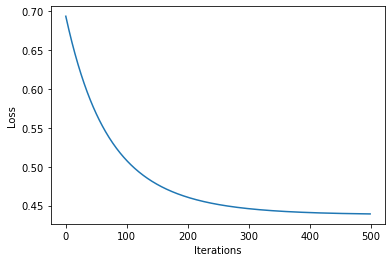

In [35]:
prediction = sigmoid(x @ Theta)
FP = 0
FN = 0
TP = 0
TN = 0
for j in range(0,Y.size):
    if prediction[j] >= 0.20:
        prediction[j] = 1
    else:
        prediction[j] = 0
for r in range(0,Y.size):
    if Y[r] == 1 and Y[r] == prediction[r]:
        TP += 1
    if Y[r] == 1 and Y[r] != prediction[r]:
        FN +=1
    if Y[r] == 0 and Y[r] == prediction[r]:
        TN += 1
    if Y[r] == 0 and Y[r] != prediction[r]:
        FP += 1
        
print('FP = ',FP)
print('FN = ',FN)
print('TP = ',TP)
print('TN = ',TN)

plt.plot(iterholder,loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()